Here we are importing the necessary packages for performing clustering and fitting

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.metrics import pairwise_distances
import seaborn as sns

Reading the data set using read_csv method in pandas

In [36]:
data=pd.read_csv('/home/rgukt/Assignments/nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [37]:
# Data Exploration
print(data.head())  # Display the first few rows
print(data.info())  # Display information about the dataset

   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762        

In [38]:
# Descriptive Statistics
print(data.describe())

       Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
mi

In [39]:
# Data Cleaning (if needed)
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                

In [40]:
# Data Analysis
# Calculate the proportion of hazardous NEOs
hazardous_count = data['Hazardous'].value_counts()
hazardous_percentage = hazardous_count[True] / data.shape[0] * 100

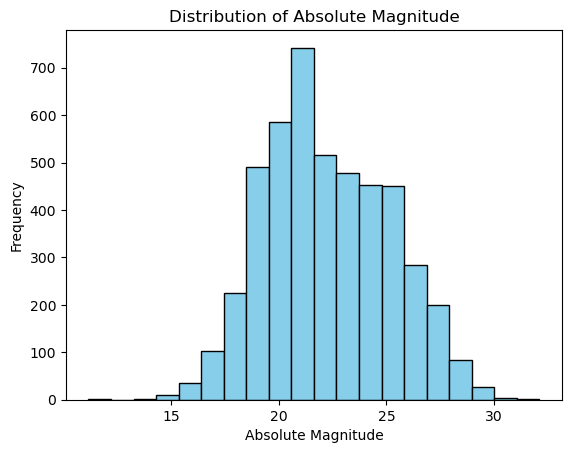

In [41]:
# Visualizations
# Plot the distribution of absolute magnitude
plt.hist(data['Absolute Magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Descriptive Statistics for Numeric Columns
numeric_data = data.select_dtypes(include=['number'])
numeric_stats = numeric_data.describe()
print(numeric_stats)

       Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
mi

In [43]:
# Statistical Depth
# Calculate skewness and kurtosis for numeric columns
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
Neo Reference ID                -1.102557
Name                            -1.102557
Absolute Magnitude               0.193925
Est Dia in KM(min)              17.670107
Est Dia in KM(max)              17.670107
Est Dia in M(min)               17.670107
Est Dia in M(max)               17.670107
Est Dia in Miles(min)           17.670107
Est Dia in Miles(max)           17.670107
Est Dia in Feet(min)            17.670107
Est Dia in Feet(max)            17.670107
Epoch Date Close Approach       -0.295022
Relative Velocity km per sec     0.887880
Relative Velocity km per hr      0.887880
Miles per hour                   0.887880
Miss Dist.(Astronomical)        -0.102394
Miss Dist.(lunar)               -0.102394
Miss Dist.(kilometers)          -0.102394
Miss Dist.(miles)               -0.102394
Orbit ID                         4.846333
Orbit Uncertainity               0.154761
Minimum Orbit Intersection       1.474985
Jupiter Tisserand Invariant      0.111239
Epoch Osculation       

In [44]:
# Correlation Matrix
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                              Neo Reference ID      Name  Absolute Magnitude  \
Neo Reference ID                      1.000000  1.000000            0.602381   
Name                                  1.000000  1.000000            0.602381   
Absolute Magnitude                    0.602381  0.602381            1.000000   
Est Dia in KM(min)                   -0.499821 -0.499821           -0.613482   
Est Dia in KM(max)                   -0.499821 -0.499821           -0.613482   
Est Dia in M(min)                    -0.499821 -0.499821           -0.613482   
Est Dia in M(max)                    -0.499821 -0.499821           -0.613482   
Est Dia in Miles(min)                -0.499821 -0.499821           -0.613482   
Est Dia in Miles(max)                -0.499821 -0.499821           -0.613482   
Est Dia in Feet(min)                 -0.499821 -0.499821           -0.613482   
Est Dia in Feet(max)                 -0.499821 -0.499821           -0.613482   
Epoch Date Close Ap

In [45]:
# Interpretation
print("Insights:")
print("1. The dataset contains information about Near-Earth Objects (NEOs).")
print("2. Descriptive statistics provide insights into the numerical variables.")
print("3. There are no missing values in the dataset.")
print(f"4. {hazardous_percentage:.2f}% of the NEOs are hazardous.")
print("5. The distribution of absolute magnitude indicates the brightness of NEOs.")

# Conclusion
print("Conclusion:")
print("Based on the analysis, we have gained insights into the characteristics of NEOs in the dataset.")


Insights:
1. The dataset contains information about Near-Earth Objects (NEOs).
2. Descriptive statistics provide insights into the numerical variables.
3. There are no missing values in the dataset.
4. 16.11% of the NEOs are hazardous.
5. The distribution of absolute magnitude indicates the brightness of NEOs.
Conclusion:
Based on the analysis, we have gained insights into the characteristics of NEOs in the dataset.


Here we are plotting the data without applying clustering.we plotted a graph to show the relationship the asteroid name and their magnitude.

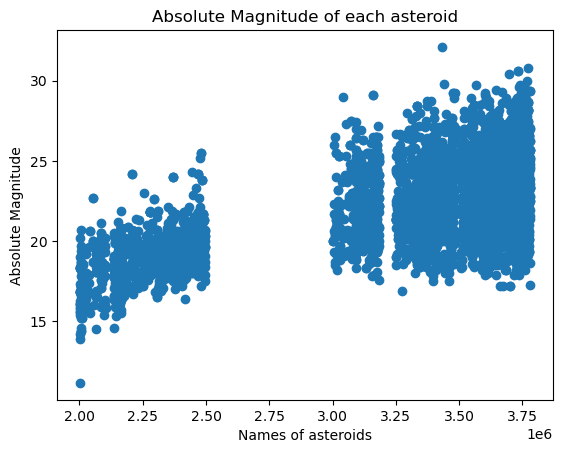

In [46]:
plt.scatter(data['Name'],data['Absolute Magnitude'])
plt.xlabel("Names of asteroids")
plt.ylabel("Absolute Magnitude")
plt.title("Absolute Magnitude of each asteroid")
plt.show()

# Clusterring 

we clusterred the above data into three clusters using KMeans clusterring.

In [47]:
km=KMeans(n_clusters=3,n_init=10)
km

KMeans(n_clusters=3, n_init=10)

Here we are predicting to which cluster the absolute magnitude belongs to either cluster 0 or 1 or 2

In [48]:
y_predicted=km.fit_predict(data[['Name','Absolute Magnitude']])
y_predicted

array([1, 1, 2, ..., 1, 1, 1], dtype=int32)

In [49]:
data['cluter']=y_predicted
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,cluter
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,1
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,2
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,1


Here we are plotting the data after applying the clustering.To each cluster we applied various colours

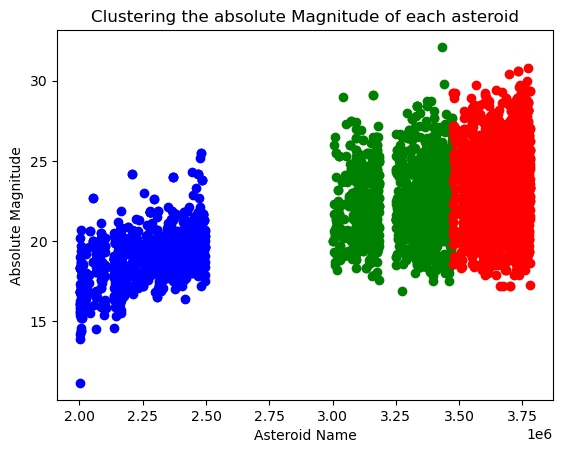

In [50]:
data1=data[data.cluter==0]
data2=data[data.cluter==1]
data3=data[data.cluter==2]

plt.scatter(data1.Name,data1['Absolute Magnitude'],color='green')
plt.scatter(data2.Name,data2['Absolute Magnitude'],color='red')
plt.scatter(data3.Name,data3['Absolute Magnitude'],color='blue')
plt.title("Clustering the absolute Magnitude of each asteroid")
plt.xlabel('Asteroid Name')
plt.ylabel('Absolute Magnitude')
plt.show()

# Fitting

After clusterring the above data into clusters,we performed fitting method using MinMaxScaler.

MinMaxScaler is a preprocessing technique used to rescale the features in a dataset to a common range, typically between 0 and 1.

scaler.transform(X): The transform method applies the scaling transformation to the input data X based on the computed minimum and maximum values from the fit step.

In [51]:
def scale_features(data):
    """
    Scale the 'Absolute Magnitude' and 'Name' features in the dataset using MinMaxScaler.

    Parameters:
    - data (DataFrame): The dataset containing 'Absolute Magnitude' and 'Name' columns.

    Returns:
    - scaled_data (DataFrame): The dataset with scaled features.
    """
    scaler = MinMaxScaler()

    # Scale 'Absolute Magnitude'
    X = data['Absolute Magnitude'].values.reshape(-1, 1)
    X_scaled = scaler.fit_transform(X)
    data['Absolute Magnitude'] = X_scaled

    # Scale 'Name'
    Y = data['Name'].values.reshape(-1, 1)
    Y_scaled = scaler.fit_transform(Y)
    data['Name'] = Y_scaled

    return data

# Example usage
scaled_data = scale_features(data)
print(scaled_data)

      Neo Reference ID      Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3703080  0.955757            0.498567            0.127220   
1              3723955  0.967475            0.484241            0.146068   
2              2446862  0.250597            0.436485            0.231502   
3              3092506  0.613020            0.775549            0.008801   
4              3514799  0.850068            0.498567            0.127220   
...                ...       ...                 ...                 ...   
4682           3759007  0.987151            0.608405            0.044112   
4683           3759295  0.987313            0.813754            0.006089   
4684           3759714  0.987548            0.551098            0.076658   
4685           3759720  0.987551            0.508118            0.116026   
4686           3772978  0.994993            0.379608            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0               0.284

In [52]:
data=data.drop(['Est Dia in KM(min)','Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)','Close Approach Date','Epoch Date Close Approach','Relative Velocity km per sec','Relative Velocity km per hr','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)','Orbiting Body','Orbit ID','Orbit Determination Date','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period','Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion','Equinox','Hazardous'],axis=1)


In [53]:
data

,Neo Reference ID,Name,Absolute Magnitude,cluter
0,3703080,0.955757,0.498567,1
1,3723955,0.967475,0.484241,1
2,2446862,0.250597,0.436485,2
3,3092506,0.613020,0.775549,0
4,3514799,0.850068,0.498567,1
...,...,...,...,...
4682,3759007,0.987151,0.608405,1
4683,3759295,0.987313,0.813754,1
4684,3759714,0.987548,0.551098,1
4685,3759720,0.987551,0.508118,1


After fitting the data performing the kMeans clusterring algorithm again

In [54]:
def perform_clustering(data, n_clusters=3):
    """
    Perform KMeans clustering on the specified dataset.

    Parameters:
    - data (DataFrame): The dataset containing 'Name' and 'Absolute Magnitude' columns.
    - n_clusters (int): The number of clusters to create.

    Returns:
    - y_predicted (array): The predicted cluster labels for each data point.
    """
    km = KMeans(n_clusters=n_clusters, n_init=10)
    y_predicted = km.fit_predict(data[['Name', 'Absolute Magnitude']])
    return y_predicted

# Example usage
y_predicted = perform_clustering(data)
print(y_predicted)

[2 2 1 ... 0 0 2]


In [55]:
data['cluster']=y_predicted
data.drop('cluter',axis='columns',inplace=True)
data

,Neo Reference ID,Name,Absolute Magnitude,cluster
0,3703080,0.955757,0.498567,2
1,3723955,0.967475,0.484241,2
2,2446862,0.250597,0.436485,1
3,3092506,0.613020,0.775549,0
4,3514799,0.850068,0.498567,2
...,...,...,...,...
4682,3759007,0.987151,0.608405,0
4683,3759295,0.987313,0.813754,0
4684,3759714,0.987548,0.551098,0
4685,3759720,0.987551,0.508118,0


In [56]:
km.cluster_centers_

array([[3.28167786e+06, 2.24383344e+01],
       [3.66805555e+06, 2.34607152e+01],
       [2.28599063e+06, 1.91148234e+01]])

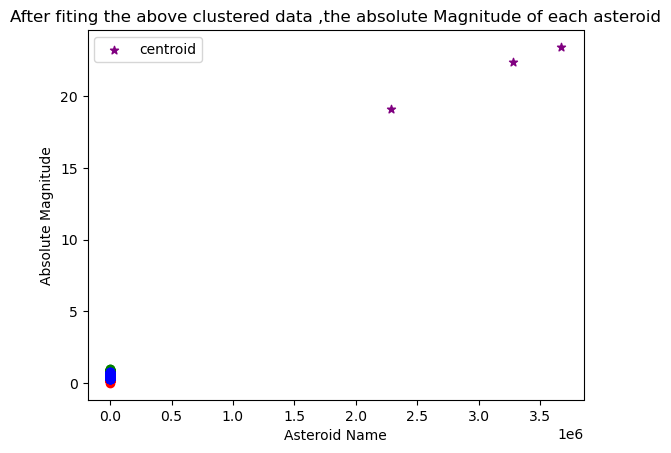

In [57]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

plt.scatter(data1.Name,data1['Absolute Magnitude'],color='green')
plt.scatter(data2.Name,data2['Absolute Magnitude'],color='red')
plt.scatter(data3.Name,data3['Absolute Magnitude'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.title("After fiting the above clustered data ,the absolute Magnitude of each asteroid")
plt.xlabel('Asteroid Name')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

Now we had completed clustering and fitting the data.Now we are showing that data through visualization. 

# Data Visualization

# Bar Graph    

This Bar Graph represents the no.of data points present in each cluster.

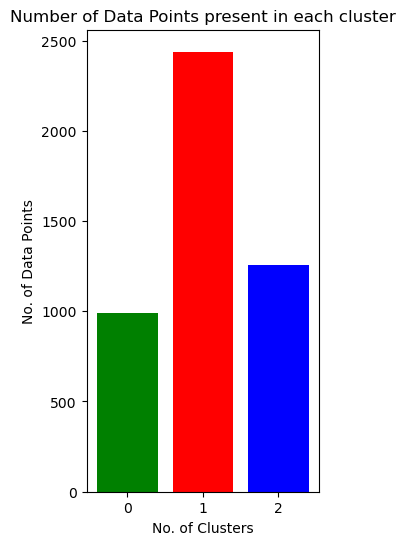

In [58]:
def visualize_cluster_sizes(data, n_clusters=3):
    """
    Create a bar graphs that visualize the sizes of clusters in the dataset.

    Parameters:
    - data (DataFrame): The dataset.
    - n_clusters (int): The number of clusters to create.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
    labels = kmeans.labels_
    cluster_counts = {}
    for label in set(labels):
        cluster_counts[label] = sum(labels == label)

    cluster_labels = list(cluster_counts.keys())
    cluster_sizes = list(cluster_counts.values())

    plt.figure(figsize=(3, 6))
    plt.bar(cluster_labels, cluster_sizes, color=["green", "red", "blue"])
    plt.xlabel('No. of Clusters')
    plt.ylabel('No. of Data Points')
    plt.title('Number of Data Points present in each cluster')
    plt.show()

# Example usage
visualize_cluster_sizes(data)

# Pie Chart

This  Pie Chart represents the proportionate of data points in each cluster.

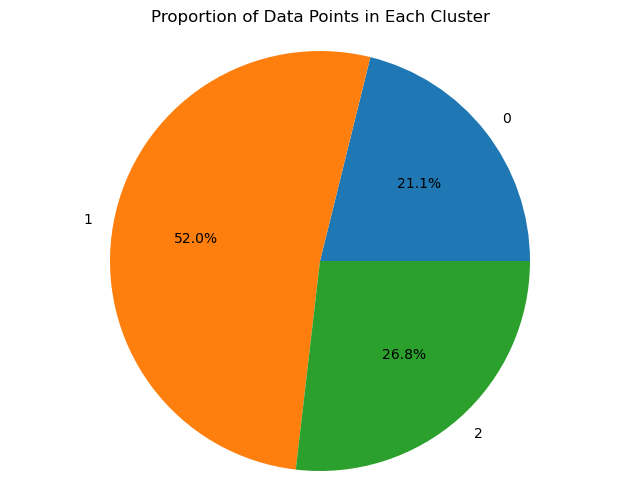

In [59]:
def visualize_cluster_proportion(data, n_clusters=3):
    """
    Create a pie chart that visualize the proportion of data points in each cluster using a pie chart.

    Parameters:
    - data (DataFrame): The dataset.
    - n_clusters (int): The number of clusters to create.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
    labels = kmeans.labels_

    cluster_counts = {}
    for label in set(labels):
        cluster_counts[label] = sum(labels == label)

    cluster_labels = list(cluster_counts.keys())
    cluster_sizes = list(cluster_counts.values())

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%')
    ax.axis('equal')  
    ax.set_title('Proportion of Data Points in Each Cluster')
    plt.show()

# Example usage
visualize_cluster_proportion(data)

# Scatter graph

K-Means Clustering Visualization with Centroids using scatter graph.


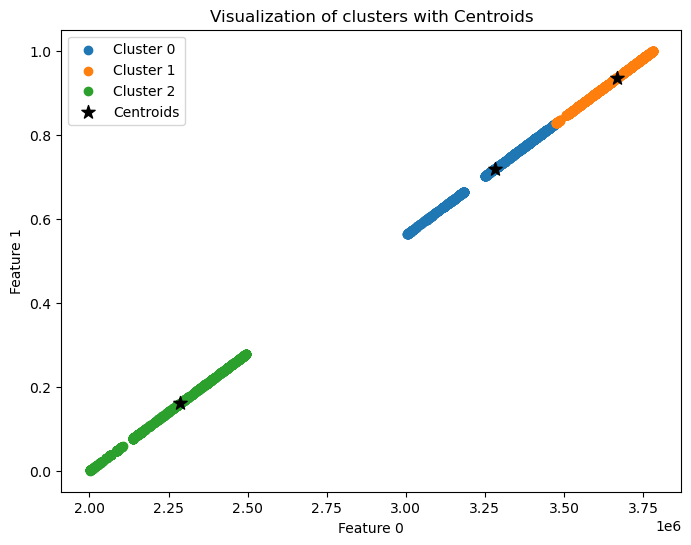

In [60]:
def visualize_clusters_with_centroids(data, n_clusters=3):
    """
    Create a scatter plot thar visualize the clusters in the dataset along with their centroids.

    Parameters:
    - data (DataFrame): The dataset.
    - n_clusters (int): The number of clusters to create.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    plt.figure(figsize=(8, 6))
    for label in set(labels):
        plt.scatter(x[labels == label], y[labels == label], label=f'Cluster {label}')

    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='k', marker='*', label='Centroids')

    plt.xlabel(f'Feature {0}')
    plt.ylabel(f'Feature {1}')
    plt.title('Visualization of clusters with Centroids')
    plt.legend()
    plt.show()

# Example usage
visualize_clusters_with_centroids(data)

# Heatmap

Showing the distance matrix between cluster centroids using heatmap.
The heatmap shows the pairwise distances between the cluster centroids, where both the x-axis and the y-axis represent the cluster centroids.
The range of distances, with warmer colors (e.g., yellow) indicating larger distances and cooler colors (e.g., blue) indicating smaller distances.


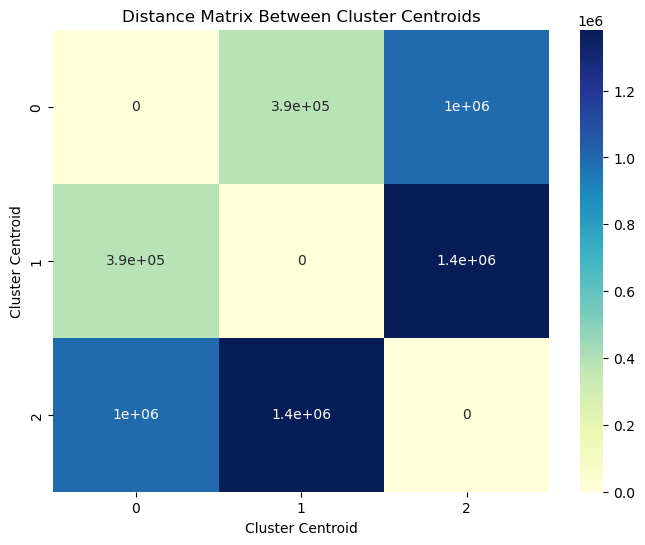

In [61]:
def visualize_distance_matrix(data, n_clusters=3):
    """
    Create a Heat Map that visualize the distance matrix between cluster centroids using a heatmap.

    Parameters:
    - data (DataFrame): The dataset.
    - n_clusters (int): The number of clusters to create.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
    centroids = kmeans.cluster_centers_

    dist_matrix = pairwise_distances(centroids)

    plt.figure(figsize=(8, 6))
    sns.heatmap(dist_matrix, annot=True, cmap="YlGnBu")

    plt.title("Distance Matrix Between Cluster Centroids")
    plt.xlabel("Cluster Centroid")
    plt.ylabel("Cluster Centroid")
    plt.show()

# Example usage
visualize_distance_matrix(data)

# Elbow plot

Visualizing the data between no.of clusters and inertia by using Elbow plot.

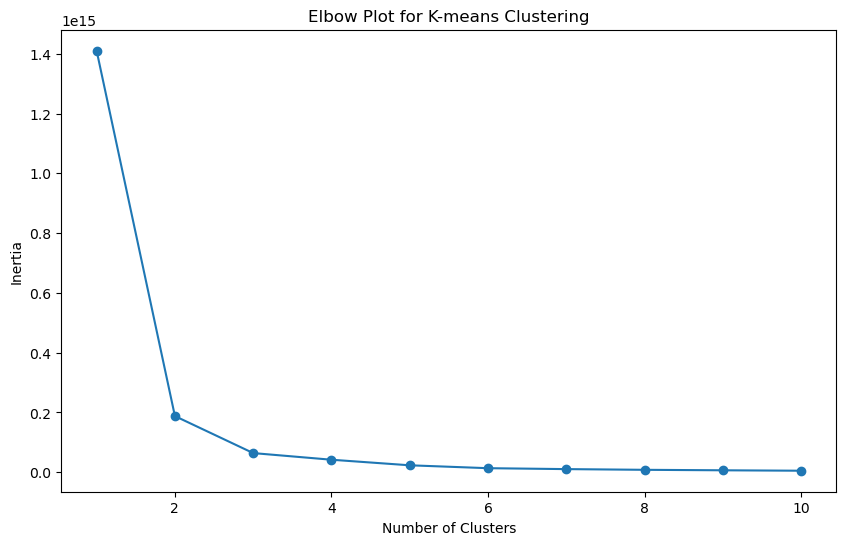

In [62]:
'''  
This is a bar graph to show the no of data points and asteriod 
'''
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10).fit(data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-means Clustering')
plt.show()

----------------------------------Thank You------------------------------------------------